In [1]:
pip install india-housing-datasets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
from india_housing_datasets import load_housing

df=load_housing('ahmedabad')

df

,city,locality,area_sqft,bhk,bath,floor,age_years,price_lakhs
0,ahmedabad,Satellite,1250,2,2,4,8,75.5
1,ahmedabad,Prahlad Nagar,1800,3,3,12,5,115.0
2,ahmedabad,Bopal,1100,2,2,2,4,48.2
3,ahmedabad,Ghatlodia,950,2,1,5,12,42.0
4,ahmedabad,Thaltej,2400,4,4,15,2,210.0
...,...,...,...,...,...,...,...,...
494,ahmedabad,Chandlodia,1200,2,2,5,9,48.0
495,ahmedabad,Gota,1600,3,3,12,3,72.0
496,ahmedabad,Tragad,1500,3,3,9,3,65.0
497,ahmedabad,Zundal,1500,3,3,7,2,65.0


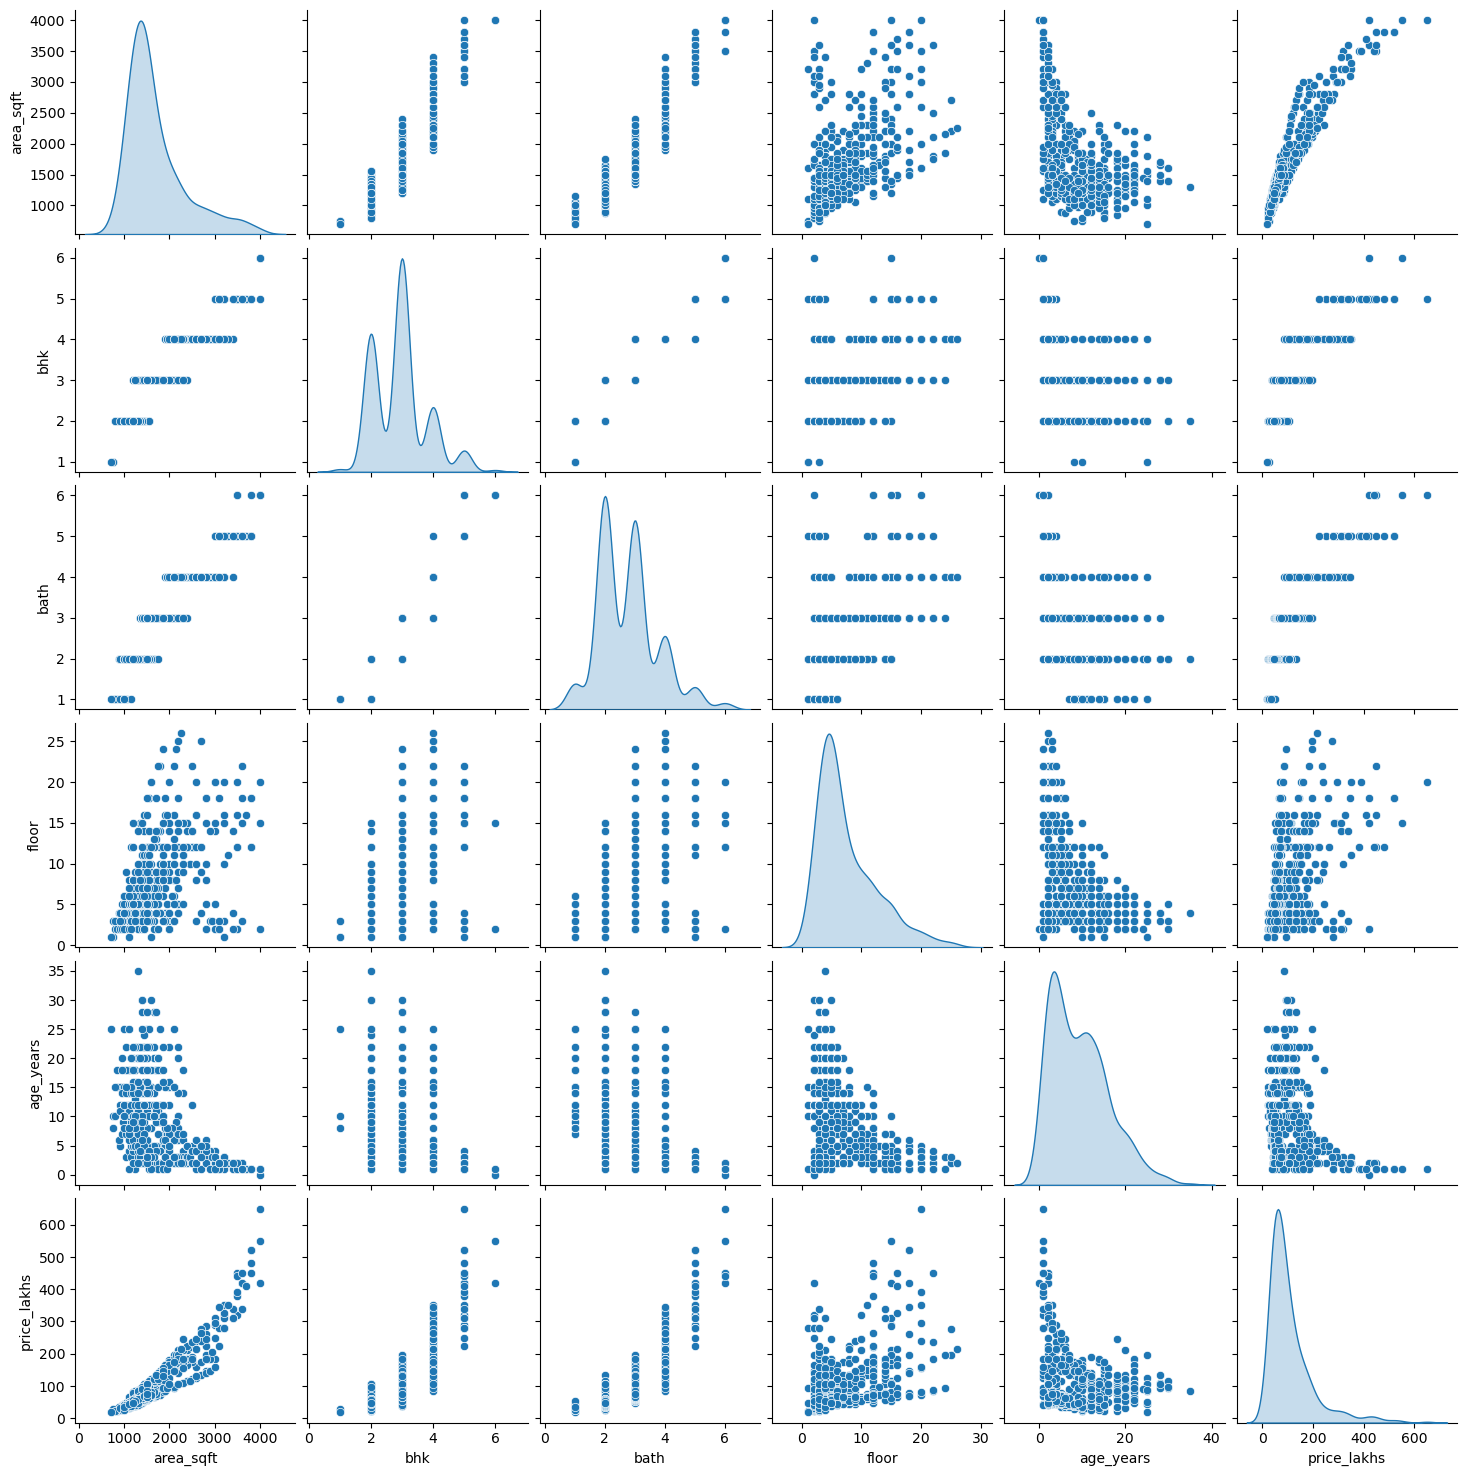

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['area_sqft', 'bhk', 'bath', 'floor', 'age_years', 'price_lakhs']

sns.pairplot(df[num_cols], diag_kind='kde')
plt.show()


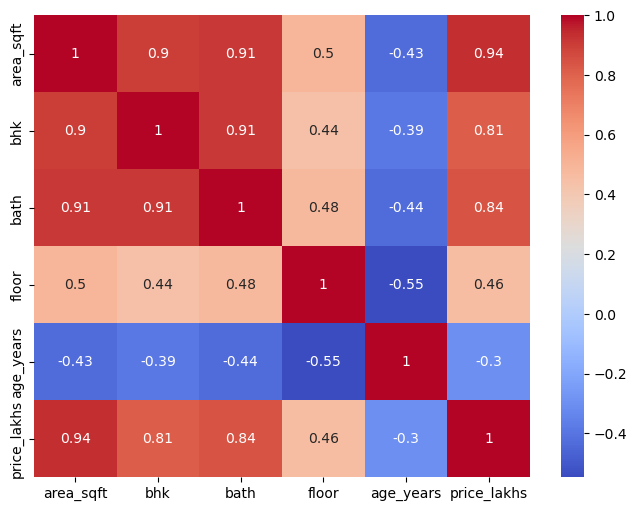

In [7]:
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df[['area_sqft','bhk','bath','floor','age_years']]
y = df['price_lakhs']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X,y)

print(rfe.support_)
print(rfe.ranking_)


[False  True  True  True False]
[3 1 1 1 2]


In [10]:
from sklearn.linear_model import LinearRegression
X = df[['area_sqft','bhk', 'floor', 'age_years']]
y = df['price_lakhs']
model = LinearRegression()
model.fit(X, y)
print("Slopes (Coefficients):")
print(model.coef_)
print("Intercept:")
print(model.intercept_)




Slopes (Coefficients):
[  0.15316665 -15.80734926   1.13280298   2.06177185]
Intercept:
-130.20634644438252


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

print("Test R²:", model.score(X_test, y_test))


Test R²: 0.8951695983953898


In [12]:
df['prediction_y'] = model.predict(X)


In [13]:
df['prediction_y']


0       49.990433
1      121.114349
2       17.273261
3       16.289725
4      193.142563
          ...    
494     46.134957
495     87.925219
496     69.646414
497     64.995957
498     78.514989
Name: prediction_y, Length: 499, dtype: float64

In [16]:
df['prediction_y_manual'] = (
    model.coef_[0] * df['area_sqft'] +
    model.coef_[1]* df['bhk']+
    model.coef_[2] * df['floor'] +
    model.coef_[3] * df['age_years'] +
    model.intercept_
)
df['prediction_y_manual']


0       49.990433
1      121.114349
2       17.273261
3       16.289725
4      193.142563
          ...    
494     46.134957
495     87.925219
496     69.646414
497     64.995957
498     78.514989
Name: prediction_y_manual, Length: 499, dtype: float64

In [20]:
import numpy as np

X = df[['area_sqft','bhk','floor','age_years']].values
y = df['price_lakhs'].values

# Add column of 1s
ones = np.ones((X.shape[0], 1))
X_new = np.hstack((ones, X))

# β=(XTX)−1XTy
x_T=X_new.T
x_T_X=np.dot(x_T,X_new)
inver=np.linalg.inv(x_T_X)
x_T_y=np.dot(x_T,y)
ans=np.dot(inver,x_T_y)

print(ans)


[-130.20634644    0.15316665  -15.80734926    1.13280298    2.06177185]


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


X = df[['area_sqft','bhk','floor','age_years']].values
y = df['price_lakhs'].values

print(X)
n = len(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


w = np.zeros(X_scaled.shape[1])
b = 0

epochs = 1000
lr = 0.01
tol = 1e-6

prev_loss = float('inf')


for i in range(epochs):

    # Prediction
    y_pred = np.dot(X_scaled, w) + b

    # Compute Loss (MSE)
    loss = (1/n) * np.sum((y - y_pred)**2)
    
    # Compute Gradients
    dw = (-2/n) * np.dot(X_scaled.T, (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)

    # Update Parameters
    w = w - lr * dw
    b = b - lr * db

    # Early Stopping
    if abs(prev_loss - loss) < tol:
        print(f"Stopped at iteration {i}")
        break

    prev_loss = loss


print("Slopes:", w)
print("Intercept:", b)


# df['prediction_gd'] = np.dot(X_scaled, w) + b


# plt.plot(loss_history)
# plt.xlabel("Iterations")
# plt.ylabel("Loss")
# plt.title("Loss Convergence")
# plt.show()


[[1250    2    4    8]
 [1800    3   12    5]
 [1100    2    2    4]
 ...
 [1500    3    9    3]
 [1500    3    7    2]
 [1500    3   16    3]]
Slopes: [91.78837055 -5.2520277   6.12906341 13.43282462]
Intercept: 110.68476935279934
